In [1]:
import numpy as np
import pandas as pd
import sklearn as svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
#import SVC classifier
from sklearn.svm import SVC

#IMPORT METRICS TO COMPUTE ACCURACY
from sklearn.metrics import accuracy_score

In [2]:
data = ("C:\\Users\\DELL\\Downloads\\insurance.csv")
df = pd.read_csv(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Convert 'sex' column to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['sex'] = le.fit_transform(df['sex']) 

# Convert 'smoker' column to numerical using LabelEncoder
df['smoker'] = le.fit_transform(df['smoker'])

# Convert 'region' column to numerical using LabelEncoder
df['region'] = le.fit_transform(df['region']) # Encode the 'region' column
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
x= df.drop(['smoker'],axis=1)
y=df['smoker']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=25)

In [9]:
from sklearn.naive_bayes import GaussianNB
#Build a Gaussian Classifier
model =  GaussianNB()

#Model Training
model.fit(x_train, y_train)

#Predict Output
predicted =  model.predict(x_test)

print("Actual Value:",y_test)
print("Predicted Value:",predicted)


Actual Value: 748     0
633     0
651     0
411     1
502     1
       ..
1233    0
505     0
875     0
1191    0
395     0
Name: smoker, Length: 442, dtype: int32
Predicted Value: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 

In [10]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       340
           1       0.80      0.72      0.76       102

    accuracy                           0.89       442
   macro avg       0.86      0.83      0.84       442
weighted avg       0.89      0.89      0.89       442



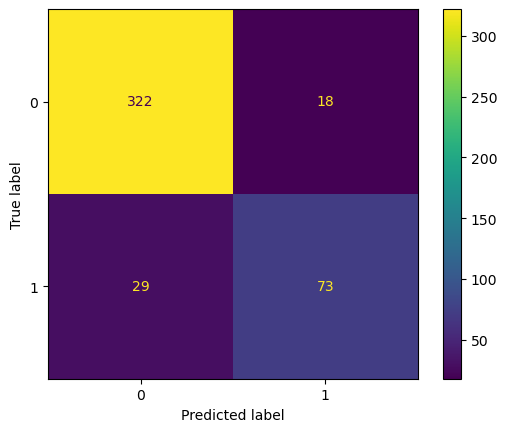

In [11]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [13]:
prediction = knn.predict(x_test)
print(y_test)
print("prediction")
print(prediction)

748     0
633     0
651     0
411     1
502     1
       ..
1233    0
505     0
875     0
1191    0
395     0
Name: smoker, Length: 442, dtype: int32
prediction
[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       340
           1       0.88      0.87      0.88       102

    accuracy                           0.94       442
   macro avg       0.92      0.92      0.92       442
weighted avg       0.94      0.94      0.94       442



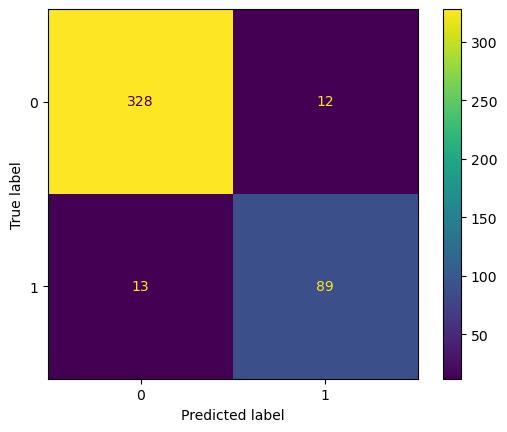

In [15]:
labels = [0,1]
cm = confusion_matrix(y_test,prediction, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [16]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'x[5] <= 14997.505\nentropy = 0.706\nsamples = 896\nvalue = [724, 172]'),
 Text(0.25, 0.5, 'x[5] <= 13691.755\nentropy = 0.042\nsamples = 667\nvalue = [664, 3]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 632\nvalue = [632, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.422\nsamples = 35\nvalue = [32, 3]'),
 Text(0.75, 0.5, 'x[5] <= 33473.895\nentropy = 0.83\nsamples = 229\nvalue = [60, 169]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.993\nsamples = 131\nvalue = [59, 72]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.082\nsamples = 98\nvalue = [1, 97]')]

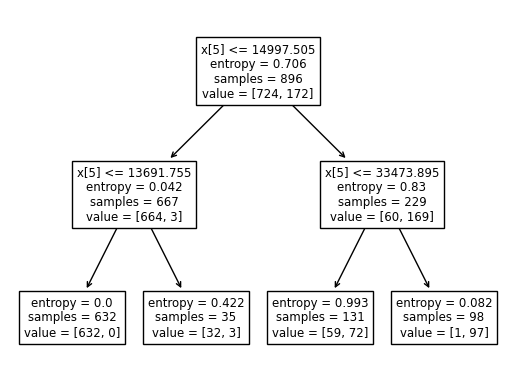

In [17]:
tree.plot_tree(clf_en)

In [18]:
y_pred_en = clf_en.predict(x_test)
print(y_pred_en)

[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       340
           1       0.76      0.96      0.85       102

    accuracy                           0.92       442
   macro avg       0.87      0.93      0.90       442
weighted avg       0.93      0.92      0.92       442



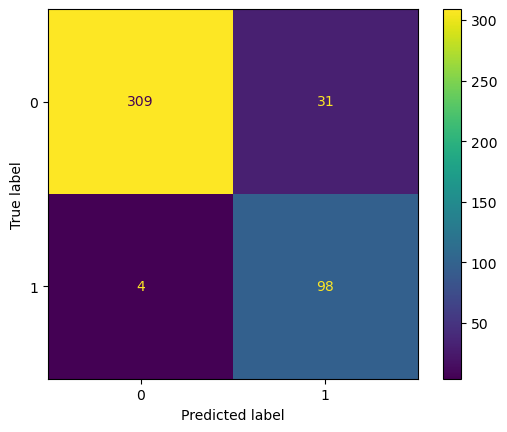

In [20]:
labels = [0,1]
cm = confusion_matrix(y_test,y_pred_en, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the test setb
y_pred_rf = clf.predict(x_test)

In [22]:
y_pred_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

In [23]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       340
           1       0.94      0.87      0.90       102

    accuracy                           0.96       442
   macro avg       0.95      0.93      0.94       442
weighted avg       0.96      0.96      0.96       442



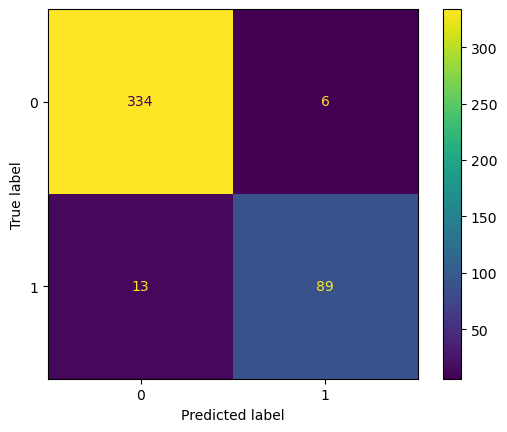

In [24]:
labels = [0,1]
cm = confusion_matrix(y_test,y_pred_rf, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [25]:
#import SVC classifier
from sklearn.svm import SVC

#IMPORT METRICS TO COMPUTE ACCURACY
from sklearn.metrics import accuracy_score

#instantiate classifier with default hyperparameters
svc = SVC()

#FIT CLASSIFIER TO TRAINING SET
svc.fit(x_train, y_train)

#make predictions on test set
y_pred = svc.predict(x_test)
print(y_pred)

#compute and print accuracy score
print('Model accuracy score with default hyperparameter: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Model accuracy score with default hyperparameter: 0.9027


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       340
           1       0.78      0.81      0.79       102

    accuracy                           0.90       442
   macro avg       0.86      0.87      0.87       442
weighted avg       0.90      0.90      0.90       442



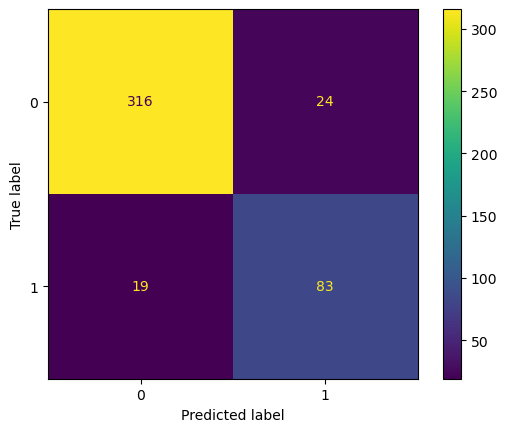

In [27]:
labels=[0,1]
cm=confusion_matrix(y_test,y_pred ,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=labels)
disp.plot();

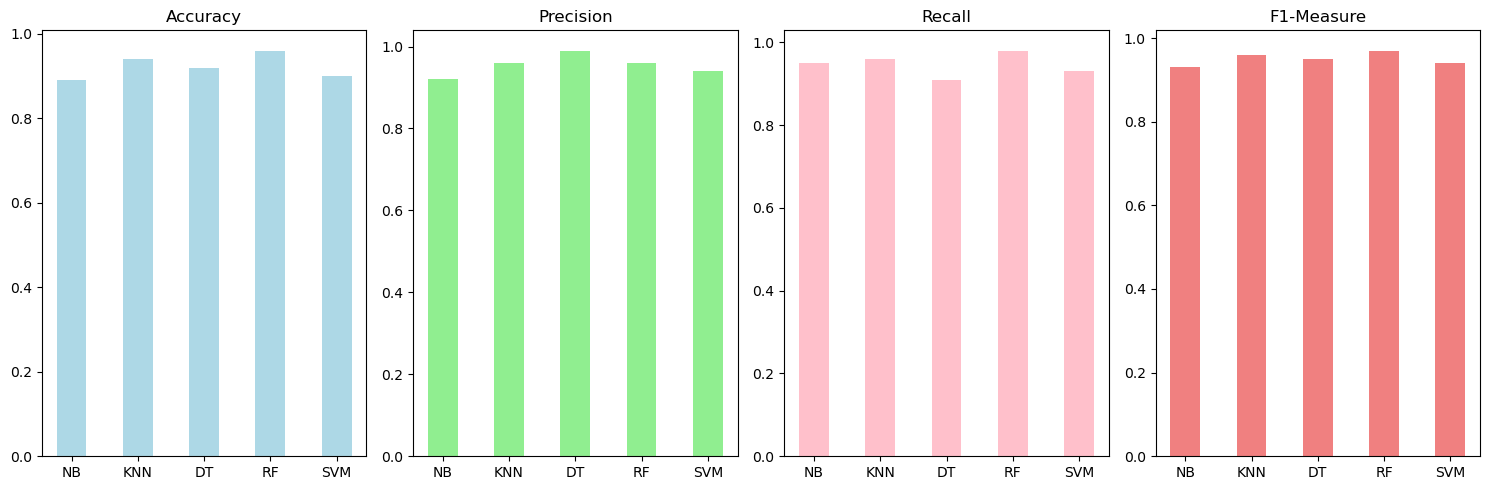

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting (example values; replace with your actual values)
classifiers = ['NB', 'KNN', 'DT', 'RF', 'SVM']
accuracy = [0.89, 0.94, 0.92, 0.96, 0.90]
precision = [0.92, 0.96, 0.99, 0.96, 0.94]
f1_measure = [0.93, 0.96, 0.95, 0.97, 0.94]
recall = [0.95, 0.96, 0.91, 0.98, 0.93]

# Number of classifiers
x = np.arange(len(classifiers))

# Width of the bars
width = 0.45

# Colors for each bar chart
colors = {
    'accuracy': 'lightblue',
    'precision': 'lightgreen',
    'f1_measure': 'lightcoral',
    'recall': 'pink'
}

# Creating subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plotting accuracy
ax[0].bar(x, accuracy, width, color=colors['accuracy'])
ax[0].set_title('Accuracy')
ax[0].set_xticks(x)
ax[0].set_xticklabels(classifiers)

# Plotting Precision
ax[1].bar(x, precision, width, color=colors['precision'])
ax[1].set_title('Precision')
ax[1].set_xticks(x)
ax[1].set_xticklabels(classifiers)

# Plotting Recall
ax[2].bar(x, recall, width, color=colors['recall'])
ax[2].set_title('Recall')
ax[2].set_xticks(x)
ax[2].set_xticklabels(classifiers)

# Plotting F1-Measure
ax[3].bar(x, f1_measure, width, color=colors['f1_measure'])
ax[3].set_title('F1-Measure')
ax[3].set_xticks(x)
ax[3].set_xticklabels(classifiers)

# Adjust layout
plt.tight_layout()
plt.show()
